**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-773bc05a73a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

**Load DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/dataset/DTR1.xlsx")
df

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
0,4.004892,-0.001081,56.191728,1.675142,5.720540,-5.186628,9.702037,-0.477618,-20.622838,-19.789414,...,1.913614,0.000000,10.975969,0.0,11.242068,0.800902,0.380952,0.000000,0.020408,67.267805
1,3.420102,0.001199,54.782903,2.581435,12.530462,-3.472567,10.553559,9.828349,-22.807983,-2.778345,...,1.949163,0.000000,10.974529,0.0,11.253449,0.838960,0.554560,1.183832,0.076350,81.231172
2,3.468904,0.001873,55.852402,0.598035,5.339215,-11.459534,2.913714,1.147006,-27.295205,4.214591,...,1.330281,0.000000,10.970085,0.0,12.598186,0.869903,0.380952,0.000000,0.076350,79.651701
3,3.806041,0.000684,272.626892,-2.553178,1.484455,-44.681920,-29.973413,9.068460,-58.056284,72.288838,...,2.021501,0.000000,11.039437,0.0,11.320550,0.869903,0.380952,0.000000,0.076350,77.400767
4,4.070837,0.000955,100.907285,-2.087684,2.389989,-28.475529,-1.228899,16.390214,-29.250764,13.437189,...,2.081879,0.000000,11.131779,0.0,11.441736,0.905084,0.095238,0.000000,0.076350,84.449391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,-0.003440,53.588858,2.438671,-4.032823,3.432222,-3.182146,-6.662593,-0.803367,6.746339,...,1.473184,-0.012780,10.896702,0.0,12.568928,0.840283,0.450000,0.000000,0.411958,1092.727086
103,4.274088,0.004998,55.673651,1.480720,-2.191748,4.090809,-4.023414,-5.866056,-1.238428,3.386608,...,1.035981,-0.161800,12.561600,0.0,13.128945,0.820132,0.359875,0.000000,0.308642,1212.536907
104,6.677781,0.001085,54.243826,3.485162,4.389542,7.581147,1.003062,2.364694,8.107587,7.501037,...,1.799573,0.009319,12.791240,0.0,12.791240,0.824885,0.707732,2.448863,0.461341,392.515890
105,4.486782,0.004594,65.923485,1.154642,-5.206149,0.994708,-5.554486,-4.103983,4.438507,3.236395,...,1.619110,-0.035079,11.368975,0.0,12.661933,0.879501,0.250000,0.000000,0.300076,786.653644


In [ ]:
print(df.columns)

Index(['pIC50', 'AATSC8c', 'AATSC0m', 'AATSC1m', 'AATSC2m', 'AATSC3m',
       'AATSC4m', 'AATSC5m', 'AATSC6m', 'AATSC7m', 'AATSC8m', 'AATSC0v',
       'AATSC2v', 'AATSC2v.1', 'AATSC4v', 'AATSC5v', 'AATSC7v', 'AATSC8v',
       'AATSC2e', 'AATSC4e', 'AATSC5e', 'AATSC6e', 'AATSC7e', 'AATSC8e',
       'AATSC7p', 'AATSC3i', 'MATS3c', 'GATS3c', 'GATS1p', 'VR2_DzZ',
       'SM1_Dzp', 'VR1_Dzp', 'SpMax7_Bhv', 'SpMax1_Bhe', 'SpMax6_Bhi', 'SsCl',
       'minHCsats', 'minHAvin', 'minHother', 'minsCH3', 'minssCH2', 'minaaCH',
       'mindssC', 'mindO', 'minssO', 'maxHBa', 'SIC2', 'CIC5', 'MDEC-13',
       'GGI8', 'VR1_DzZ'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pIC50       107 non-null    float64
 1   AATSC8c     107 non-null    float64
 2   AATSC0m     107 non-null    float64
 3   AATSC1m     107 non-null    float64
 4   AATSC2m     107 non-null    float64
 5   AATSC3m     107 non-null    float64
 6   AATSC4m     107 non-null    float64
 7   AATSC5m     107 non-null    float64
 8   AATSC6m     107 non-null    float64
 9   AATSC7m     107 non-null    float64
 10  AATSC8m     107 non-null    float64
 11  AATSC0v     107 non-null    float64
 12  AATSC2v     107 non-null    float64
 13  AATSC2v.1   107 non-null    float64
 14  AATSC4v     107 non-null    float64
 15  AATSC5v     107 non-null    float64
 16  AATSC7v     107 non-null    float64
 17  AATSC8v     107 non-null    float64
 18  AATSC2e     107 non-null    float64
 19  AATSC4e     107 non-null    f

**Checking for Null Values**

In [ ]:
df.isnull()

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pIC50         0
AATSC8c       0
AATSC0m       0
AATSC1m       0
AATSC2m       0
AATSC3m       0
AATSC4m       0
AATSC5m       0
AATSC6m       0
AATSC7m       0
AATSC8m       0
AATSC0v       0
AATSC2v       0
AATSC2v.1     0
AATSC4v       0
AATSC5v       0
AATSC7v       0
AATSC8v       0
AATSC2e       0
AATSC4e       0
AATSC5e       0
AATSC6e       0
AATSC7e       0
AATSC8e       0
AATSC7p       0
AATSC3i       0
MATS3c        0
GATS3c        0
GATS1p        0
VR2_DzZ       0
SM1_Dzp       0
VR1_Dzp       0
SpMax7_Bhv    0
SpMax1_Bhe    0
SpMax6_Bhi    0
SsCl          0
minHCsats     0
minHAvin      0
minHother     0
minsCH3       0
minssCH2      0
minaaCH       0
mindssC       0
mindO         0
minssO        0
maxHBa        0
SIC2          0
CIC5          0
MDEC-13       0
GGI8          0
VR1_DzZ       0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
0,4.004892,-0.001081,56.191728,1.675142,5.720540,-5.186628,9.702037,-0.477618,-20.622838,-19.789414,...,1.913614,0.000000,10.975969,0.0,11.242068,0.800902,0.380952,0.000000,0.020408,67.267805
1,3.420102,0.001199,54.782903,2.581435,12.530462,-3.472567,10.553559,9.828349,-22.807983,-2.778345,...,1.949163,0.000000,10.974529,0.0,11.253449,0.838960,0.554560,1.183832,0.076350,81.231172
2,3.468904,0.001873,55.852402,0.598035,5.339215,-11.459534,2.913714,1.147006,-27.295205,4.214591,...,1.330281,0.000000,10.970085,0.0,12.598186,0.869903,0.380952,0.000000,0.076350,79.651701
3,3.806041,0.000684,272.626892,-2.553178,1.484455,-44.681920,-29.973413,9.068460,-58.056284,72.288838,...,2.021501,0.000000,11.039437,0.0,11.320550,0.869903,0.380952,0.000000,0.076350,77.400767
4,4.070837,0.000955,100.907285,-2.087684,2.389989,-28.475529,-1.228899,16.390214,-29.250764,13.437189,...,2.081879,0.000000,11.131779,0.0,11.441736,0.905084,0.095238,0.000000,0.076350,84.449391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,-0.003440,53.588858,2.438671,-4.032823,3.432222,-3.182146,-6.662593,-0.803367,6.746339,...,1.473184,-0.012780,10.896702,0.0,12.568928,0.840283,0.450000,0.000000,0.411958,1092.727086
103,4.274088,0.004998,55.673651,1.480720,-2.191748,4.090809,-4.023414,-5.866056,-1.238428,3.386608,...,1.035981,-0.161800,12.561600,0.0,13.128945,0.820132,0.359875,0.000000,0.308642,1212.536907
104,6.677781,0.001085,54.243826,3.485162,4.389542,7.581147,1.003062,2.364694,8.107587,7.501037,...,1.799573,0.009319,12.791240,0.0,12.791240,0.824885,0.707732,2.448863,0.461341,392.515890
105,4.486782,0.004594,65.923485,1.154642,-5.206149,0.994708,-5.554486,-4.103983,4.438507,3.236395,...,1.619110,-0.035079,11.368975,0.0,12.661933,0.879501,0.250000,0.000000,0.300076,786.653644


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pIC50       107 non-null    float64
 1   AATSC8c     107 non-null    float64
 2   AATSC0m     107 non-null    float64
 3   AATSC1m     107 non-null    float64
 4   AATSC2m     107 non-null    float64
 5   AATSC3m     107 non-null    float64
 6   AATSC4m     107 non-null    float64
 7   AATSC5m     107 non-null    float64
 8   AATSC6m     107 non-null    float64
 9   AATSC7m     107 non-null    float64
 10  AATSC8m     107 non-null    float64
 11  AATSC0v     107 non-null    float64
 12  AATSC2v     107 non-null    float64
 13  AATSC2v.1   107 non-null    float64
 14  AATSC4v     107 non-null    float64
 15  AATSC5v     107 non-null    float64
 16  AATSC7v     107 non-null    float64
 17  AATSC8v     107 non-null    float64
 18  AATSC2e     107 non-null    float64
 19  AATSC4e     107 non-null    f

In [ ]:
df2.describe()

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.216168,0.000436,68.973974,2.103975,3.934140,-4.101257,-2.010075,-1.405998,-6.283709,3.907197,...,1.643461,-0.138589,12.129338,1.752674,12.884221,0.822614,0.415746,1.258539,0.348919,403.578292
std,0.725320,0.001577,50.382806,1.569383,4.746026,8.386236,6.760700,6.342431,11.511768,10.925866,...,0.387702,0.241858,0.657204,2.529241,0.511464,0.047400,0.154668,1.489161,0.136218,239.716603
min,3.301030,-0.003440,40.602673,-4.531775,-7.656229,-44.681920,-29.973413,-15.893010,-58.056284,-19.789414,...,0.669730,-0.742376,10.845655,0.000000,11.242068,0.705943,0.088889,0.000000,0.020408,67.267805
25%,3.733644,-0.000340,52.375448,1.154642,1.259340,-8.639818,-4.412714,-6.340113,-11.208183,-1.220543,...,1.394079,-0.334068,11.683444,0.000000,12.669044,0.778066,0.329932,0.000000,0.281943,284.812022
50%,4.069153,0.000440,55.822948,2.309643,3.966076,-3.662230,-2.028492,-0.902812,-4.730349,2.680237,...,1.788365,-0.012780,12.399476,0.000000,12.794758,0.830688,0.389649,1.100077,0.369134,334.407370
75%,4.489463,0.001217,66.911484,3.104497,7.431246,2.605721,1.077669,2.462002,-0.265521,7.097166,...,1.966653,0.000000,12.569215,5.233781,13.183281,0.864977,0.524606,1.815464,0.451909,421.076174
max,6.677781,0.004998,429.304391,4.929388,14.018953,7.581147,11.033363,16.390214,36.830568,72.288838,...,2.093626,0.322806,12.894797,6.316530,13.864402,0.905243,0.838847,7.400141,0.597183,1358.274114


In [ ]:
scale = StandardScaler()
df2_sc = scale.fit_transform(df2)
df2_sc = pd.DataFrame(df2_sc, columns = df2.columns)

In [ ]:
df2_sc.head()

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
0,-0.292658,-0.967099,-0.254896,-0.274535,0.378171,-0.130032,1.740534,0.147065,-1.251468,-2.179061,...,0.700085,0.575715,-1.763221,-0.696225,-3.225805,-0.460221,-0.226019,-0.849110,-2.423002,-1.409552
1,-1.102702,0.486094,-0.282990,0.305666,1.819791,0.075320,1.867078,1.779636,-1.442180,-0.614780,...,0.792208,0.575715,-1.765423,-0.696225,-3.203448,0.346474,0.901721,-0.050403,-2.010394,-1.351029
2,-1.035102,0.915140,-0.261663,-0.964091,0.297446,-0.881552,0.731723,0.404422,-1.833808,0.028267,...,-0.811588,0.575715,-1.772218,-0.696225,-0.561881,1.002342,-0.226019,-0.849110,-2.010394,-1.357649
3,-0.568104,0.157749,4.061133,-2.981471,-0.518584,-4.861732,-4.155625,1.659261,-4.518525,6.288146,...,0.979668,0.575715,-1.666196,-0.696225,-3.071636,1.002342,-0.226019,-0.849110,-2.010394,-1.367083
4,-0.201312,0.330435,0.636796,-2.683466,-0.326888,-2.920139,0.116090,2.819102,-2.004482,0.876346,...,1.136134,0.575715,-1.525026,-0.696225,-2.833581,1.748066,-2.081990,-0.849110,-2.010394,-1.337541


In [ ]:
df2_sc.describe()

,pIC50,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,107.000000,1.070000e+02,1.070000e+02,...,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,5.260589e-16,-8.300733e-18,-2.691253e-16,3.527811e-17,-5.810513e-17,-3.735330e-17,2.905257e-17,0.000000,-1.245110e-17,-4.526493e-17,...,-2.669204e-16,-1.193230e-16,-1.834462e-15,9.545843e-17,3.579691e-15,8.010207e-16,-1.743154e-16,-5.395476e-17,6.018031e-17,-1.701650e-16
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706,1.004706e+00,1.004706e+00,...,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-1.267640e+00,-2.470146e+00,-5.657647e-01,-4.248153e+00,-2.453613e+00,-4.861732e+00,-4.155625e+00,-2.294891,-4.518525e+00,-2.179061e+00,...,-2.523366e+00,-2.508194e+00,-1.962441e+00,-6.962253e-01,-3.225805e+00,-2.473003e+00,-2.123234e+00,-8.491101e-01,-2.423002e+00,-1.409552e+00
25%,-6.683871e-01,-4.944420e-01,-3.309986e-01,-6.077551e-01,-5.662395e-01,-5.437385e-01,-3.570556e-01,-0.781614,-4.297905e-01,-4.715298e-01,...,-6.462584e-01,-8.120405e-01,-6.816646e-01,-6.962253e-01,-4.226900e-01,-9.442660e-01,-5.574422e-01,-8.491101e-01,-4.939959e-01,-4.977760e-01
50%,-2.036441e-01,2.268354e-03,-2.622505e-01,1.316671e-01,6.760725e-03,5.259724e-02,-2.736951e-03,0.079710,1.355717e-01,-1.128272e-01,...,3.755099e-01,5.226245e-01,4.129746e-01,-6.962253e-01,-1.757397e-01,1.711237e-01,-1.695294e-01,-1.069108e-01,1.491029e-01,-2.899108e-01
75%,3.785654e-01,4.970769e-01,-4.112902e-02,6.405256e-01,7.403170e-01,8.035238e-01,4.588689e-01,0.612731,5.252459e-01,2.933388e-01,...,8.375334e-01,5.757151e-01,6.724648e-01,1.382822e+00,5.874648e-01,8.979325e-01,7.071383e-01,3.757457e-01,7.596227e-01,7.333754e-02
max,3.409799e+00,2.906918e+00,7.185509e+00,1.808806e+00,2.134896e+00,1.399601e+00,1.938382e+00,2.819102,3.762860e+00,6.288146e+00,...,1.166577e+00,1.916685e+00,1.170201e+00,1.812929e+00,1.925442e+00,1.751422e+00,2.748420e+00,4.143611e+00,1.831125e+00,4.001344e+00


**Input and Output Preparation**

In [ ]:
X = df2_sc.drop(['pIC50'],axis = 1)
X

,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
0,-0.967099,-0.254896,-0.274535,0.378171,-0.130032,1.740534,0.147065,-1.251468,-2.179061,-0.680539,...,0.700085,0.575715,-1.763221,-0.696225,-3.225805,-0.460221,-0.226019,-0.849110,-2.423002,-1.409552
1,0.486094,-0.282990,0.305666,1.819791,0.075320,1.867078,1.779636,-1.442180,-0.614780,-4.822624,...,0.792208,0.575715,-1.765423,-0.696225,-3.203448,0.346474,0.901721,-0.050403,-2.010394,-1.351029
2,0.915140,-0.261663,-0.964091,0.297446,-0.881552,0.731723,0.404422,-1.833808,0.028267,1.460018,...,-0.811588,0.575715,-1.772218,-0.696225,-0.561881,1.002342,-0.226019,-0.849110,-2.010394,-1.357649
3,0.157749,4.061133,-2.981471,-0.518584,-4.861732,-4.155625,1.659261,-4.518525,6.288146,3.305623,...,0.979668,0.575715,-1.666196,-0.696225,-3.071636,1.002342,-0.226019,-0.849110,-2.010394,-1.367083
4,0.330435,0.636796,-2.683466,-0.326888,-2.920139,0.116090,2.819102,-2.004482,0.876346,2.671478,...,1.136134,0.575715,-1.525026,-0.696225,-2.833581,1.748066,-2.081990,-0.849110,-2.010394,-1.337541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-2.470146,-0.306801,0.214270,-1.686559,0.902542,-0.174181,-0.832698,0.478305,0.261078,-0.946173,...,-0.441262,0.522625,-1.884401,-0.696225,-0.619355,0.374521,0.222508,-0.849110,0.464961,2.888377
103,2.906918,-0.265228,-0.399003,-1.296815,0.981444,-0.299202,-0.706519,0.440334,-0.047872,-0.934051,...,-1.574249,-0.096419,0.660824,-0.696225,0.480728,-0.052620,-0.362933,-0.849110,-0.297071,3.390527
104,0.413129,-0.293740,0.884225,0.096406,1.399601,0.447781,0.597316,1.256021,0.330477,-0.594630,...,0.404555,0.614425,1.011887,-0.696225,-0.182651,0.048138,1.896706,0.803087,0.829194,-0.046365
105,2.649249,-0.060831,-0.607755,-1.934946,0.610518,-0.526734,-0.427388,0.935797,-0.061685,-1.369308,...,-0.063103,0.429992,-1.162411,-0.696225,-0.436657,1.205790,-1.076672,-0.849110,-0.360254,1.605554


In [ ]:
Y = df2_sc.pIC50
Y

0     -0.292658
1     -1.102702
2     -1.035102
3     -0.568104
4     -0.201312
         ...   
102    1.147136
103    0.080230
104    3.409799
105    0.374852
106    0.978083
Name: pIC50, Length: 107, dtype: float64

In [ ]:
X.shape

(107, 50)

In [ ]:
Y.shape

(107,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
AATSC8c,1.000000,-0.003841,0.002641,-0.040330,0.012010,-0.016477,0.045061,0.035977,0.040094,0.051971,...,-0.078816,0.002978,0.111140,0.070110,0.093218,0.283102,-0.242978,0.011620,-0.191099,0.177164
AATSC0m,-0.003841,1.000000,-0.498349,-0.210930,-0.624997,-0.638529,-0.180679,-0.043990,0.473386,0.274636,...,0.264276,0.196756,0.001669,-0.215046,-0.312715,0.017279,-0.026163,-0.194120,-0.324046,-0.199980
AATSC1m,0.002641,-0.498349,1.000000,-0.109823,0.821645,0.360732,0.125334,0.263257,-0.496219,-0.296399,...,0.287193,0.285920,0.215761,0.288960,0.090719,-0.421667,0.514503,0.380214,0.254311,0.169926
AATSC2m,-0.040330,-0.210930,-0.109823,1.000000,-0.292835,0.129385,0.249901,-0.325172,0.178986,0.164273,...,-0.080347,-0.556678,-0.000936,0.037225,-0.066573,0.410356,-0.058099,0.478435,0.020985,-0.341821
AATSC3m,0.012010,-0.624997,0.821645,-0.292835,1.000000,0.511311,-0.019456,0.334768,-0.690784,-0.495565,...,0.093185,0.253502,0.145254,0.173382,0.216918,-0.386225,0.347814,0.190180,0.233232,0.325699
AATSC4m,-0.016477,-0.638529,0.360732,0.129385,0.511311,1.000000,-0.013717,0.056956,-0.553376,-0.431933,...,-0.063761,-0.033470,0.133438,-0.118158,0.157631,-0.211011,0.042648,0.106868,-0.058213,0.143133
AATSC5m,0.045061,-0.180679,0.125334,0.249901,-0.019456,-0.013717,1.000000,0.034578,-0.061357,-0.002658,...,0.110297,0.031299,-0.011771,0.260324,-0.132645,0.068181,0.134300,0.248133,0.149202,-0.124417
AATSC6m,0.035977,-0.043990,0.263257,-0.325172,0.334768,0.056956,0.034578,1.000000,-0.497130,-0.376719,...,-0.012496,0.214407,0.261887,0.324396,0.369903,-0.424087,0.214982,0.073396,0.409473,0.208815
AATSC7m,0.040094,0.473386,-0.496219,0.178986,-0.690784,-0.553376,-0.061357,-0.497130,1.000000,0.528812,...,-0.037436,-0.282020,-0.098473,-0.174822,-0.125718,0.445734,-0.206802,-0.119650,0.000389,-0.138708
AATSC8m,0.051971,0.274636,-0.296399,0.164273,-0.495565,-0.431933,-0.002658,-0.376719,0.528812,1.000000,...,-0.002074,-0.323768,0.013059,-0.019059,0.071440,0.371452,-0.196542,0.032929,0.092651,-0.209423


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,AATSC0v,AATSC2v,AATSC2v.1,AATSC4v,AATSC5v,AATSC7v,AATSC8v,AATSC2e,AATSC4e,AATSC5e,AATSC6e,AATSC7e,AATSC8e,AATSC7p,AATSC3i,MATS3c,GATS3c,GATS1p,VR2_DzZ,SM1_Dzp,VR1_Dzp,SpMax7_Bhv,SpMax1_Bhe,SpMax6_Bhi,SsCl,minHCsats,minHAvin,minHother,minsCH3,minssCH2,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
AATSC8c,1.000000,-0.003841,0.002641,-0.040330,0.012010,-0.016477,0.045061,0.035977,0.040094,0.051971,-0.199668,0.138405,0.138405,-0.070216,-0.014973,0.184506,0.146737,0.143762,0.045419,-0.010090,-0.241294,-0.217342,0.528134,0.097521,0.102984,0.086329,-0.223937,0.059212,0.176557,-0.188844,-0.168794,-0.036104,-0.152492,-0.043537,0.063056,0.110871,-0.112366,0.122729,-0.142258,0.106426,-0.078816,0.002978,0.111140,0.070110,0.093218,0.283102,-0.242978,0.011620,-0.191099,0.177164
AATSC0m,-0.003841,1.000000,-0.498349,-0.210930,-0.624997,-0.638529,-0.180679,-0.043990,0.473386,0.274636,0.269096,-0.201065,-0.201065,-0.031919,-0.000771,0.087550,0.118691,0.118064,0.182298,-0.084242,-0.245153,-0.224217,-0.031708,0.418883,-0.036242,-0.242608,0.238717,-0.558198,-0.131812,0.392148,-0.133915,-0.292720,-0.275115,-0.367637,0.085714,-0.165679,-0.109671,-0.239755,-0.238300,0.198426,0.264276,0.196756,0.001669,-0.215046,-0.312715,0.017279,-0.026163,-0.194120,-0.324046,-0.199980
AATSC1m,0.002641,-0.498349,1.000000,-0.109823,0.821645,0.360732,0.125334,0.263257,-0.496219,-0.296399,0.480580,0.134231,0.134231,0.212661,-0.095027,0.187675,-0.301840,-0.231312,-0.087094,-0.043889,0.393070,0.239094,-0.106921,-0.236090,0.343083,0.555294,-0.306320,0.669552,0.115425,0.144817,0.218608,0.432427,0.007756,0.435542,-0.383476,0.452794,-0.428703,-0.233710,0.529644,0.356455,0.287193,0.285920,0.215761,0.288960,0.090719,-0.421667,0.514503,0.380214,0.254311,0.169926
AATSC2m,-0.040330,-0.210930,-0.109823,1.000000,-0.292835,0.129385,0.249901,-0.325172,0.178986,0.164273,-0.070546,0.753576,0.753576,-0.350345,0.264695,-0.347993,0.171967,0.198724,0.234404,0.563835,-0.189906,-0.000103,-0.096508,-0.089120,-0.278003,-0.342901,0.201952,0.079880,-0.307307,-0.137792,-0.176655,-0.058188,0.191816,-0.037481,0.050783,-0.092074,0.692945,0.053130,0.368401,-0.660729,-0.080347,-0.556678,-0.000936,0.037225,-0.066573,0.410356,-0.058099,0.478435,0.020985,-0.341821
AATSC3m,0.012010,-0.624997,0.821645,-0.292835,1.000000,0.511311,-0.019456,0.334768,-0.690784,-0.495565,0.275870,-0.052532,-0.052532,0.357366,-0.240722,0.079634,-0.458083,-0.198450,-0.175965,-0.243712,0.332291,0.255637,-0.075137,-0.435274,0.322923,0.580288,-0.311483,0.655214,0.274719,-0.024871,0.191942,0.454067,-0.025159,0.427303,-0.281566,0.428812,-0.511509,-0.028723,0.299444,0.433357,0.093185,0.253502,0.145254,0.173382,0.216918,-0.386225,0.347814,0.190180,0.233232,0.325699
AATSC4m,-0.016477,-0.638529,0.360732,0.129385,0.511311,1.000000,-0.013717,0.056956,-0.553376,-0.431933,0.046141,0.027328,0.027328,0.396656,0.043045,-0.103702,-0.301310,-0.007029,0.393658,0.155514,0.051691,0.148000,-0.259968,-0.387790,0.072181,0.033761,0.033825,0.166959,0.164318,0.035002,0.170151,0.053849,-0.153078,0.003891,0.098478,0.005290,-0.149267,-0.086208,0.293046,0.047306,-0.063761,-0.033470,0.133438,-0.118158,0.157631,-0.211011,0.042648,0.106868,-0.058213,0.143133
AATSC5m,0.045061,-0.180679,0.125334,0.249901,-0.019456,-0.013717,1.000000,0.034578,-0.061357,-0.002658,0.149769,0.333358,0.333358,-0.203365,0.791464,0.295124,0.021584,-0.108375,0.057560,0.059932,0.376846,0.012973,-0.027962,0.110669,-0.286896,0.245917,-0.528489,0.329901,-0.181773,0.013094,-0.195716,-0.070191,0.368280,0.084936,-0.021799,0.222702,0.171269,-0.019634,0.417613,-0.115146,0.110297,0.031299,-0.011771,0.260324,-0.132645,0.068181,0.134300,0.248133,0.149202,-0.124417
AATSC6m,0.035977,-0.043990,0.263257,-0.325172,0.334768,0.056956,0.034578,1.000000,-0.497130,-0.376719,0.083772,0.011804,0.011804,-0.033586,-0.029789,0.182834,-0.396969,-0.344523,-0.264669,-0.098289,0.603114,0.511134,-0.087561,-0.394578,0.095

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(85, 50) (22, 50) (85,) (22,)


In [ ]:
X_train

,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
67,-0.013025,0.133177,0.431508,-0.861324,0.991668,1.253686,0.596001,0.153065,0.119436,0.032392,...,0.954693,0.141637,0.961658,-0.696225,0.717353,-0.256774,0.071980,-0.319457,1.005910,-0.075619
26,-0.446332,-0.251713,-0.031126,1.172303,-0.315286,-0.193183,-1.556886,-0.120341,0.959489,0.218722,...,-0.868663,-1.027304,0.317927,-0.696225,0.294400,0.816036,-0.471664,0.400819,0.100728,-0.483500
22,-1.439569,-0.021427,-1.396496,0.183568,-0.718159,-0.142552,-1.157869,-0.538504,0.917598,-0.317009,...,-2.372800,-1.275003,0.312707,-0.696225,1.925442,1.419042,-1.726262,-0.849110,0.464961,-0.523169
31,0.002268,-0.277248,0.633451,2.134896,-0.403317,0.364882,0.698960,0.534100,-0.105306,-0.211681,...,0.814738,-0.821648,0.501008,-0.696225,-0.255860,-0.615696,-0.279312,2.615213,0.149103,-0.519026
56,0.132261,-0.565765,0.107023,-0.479866,0.275870,-0.102842,-0.479074,0.501016,-0.188853,-0.297153,...,-0.702856,0.575715,-1.934131,-0.696225,-0.227447,-1.851640,1.068799,-0.849110,1.368400,0.069380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.436558,-0.328478,1.332351,-0.834812,1.072678,0.063768,0.892969,0.183564,-0.689246,0.446901,...,0.669293,-0.069971,0.844785,1.434570,0.604614,-0.228996,0.178308,0.425776,0.823793,0.149760
14,0.737558,0.231118,-0.616129,0.447090,-0.589134,1.692319,-0.592540,1.860485,-1.435238,1.021919,...,0.909663,0.575715,0.972890,1.812929,0.549172,-0.862895,-0.057085,0.115938,0.334878,-0.107726
92,1.268941,-0.229136,-0.111807,-0.285809,-0.443781,-1.383352,0.850214,0.670993,0.001835,0.344669,...,0.312296,0.575715,0.650655,1.414306,-0.054803,0.884612,-0.887838,-0.849110,-0.064605,-0.133575
51,-0.592892,-0.539119,-0.037348,-0.498335,0.138847,-0.018074,-0.187606,0.510958,-0.212380,-0.440190,...,-0.684262,0.575715,-1.962441,-0.696225,1.223427,-1.376670,0.707138,-0.849110,0.907418,0.411014


In [ ]:
Y_train

67     0.360448
26    -0.615563
22    -0.410117
31    -0.577801
56     0.382279
         ...   
71    -0.098797
14     0.329546
92    -0.135998
51     0.245356
102    1.147136
Name: pIC50, Length: 85, dtype: float64

In [ ]:
X_test

,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,...,minaaCH,mindssC,mindO,minssO,maxHBa,SIC2,CIC5,MDEC-13,GGI8,VR1_DzZ
76,0.161572,-0.364510,1.172455,-1.037594,1.155436,0.272201,0.648112,0.017242,-0.520794,0.494830,...,0.937827,0.015959,1.170201,-0.696225,0.929079,-1.190642,-0.376922,-0.315878,0.823793,0.883798
10,-0.804448,-0.421507,-0.121706,0.685994,0.283470,-0.034125,2.614260,-0.431867,-1.645806,-0.673727,...,-0.172360,0.575715,0.166052,-0.696225,-0.732567,-0.571881,-0.178377,-0.005601,-1.162995,-0.708280
4,0.330435,0.636796,-2.683466,-0.326888,-2.920139,0.116090,2.819102,-2.004482,0.876346,2.671478,...,1.136134,0.575715,-1.525026,-0.696225,-2.833581,1.748066,-2.081990,-0.849110,-2.010394,-1.337541
99,-0.954707,-0.487599,0.740139,0.622925,-0.009683,-0.357852,0.467615,0.404141,-0.236898,0.579108,...,0.186751,0.575715,0.777653,1.416436,0.108382,1.129506,-0.945484,1.116550,0.314436,-0.363443
70,0.500100,-0.328478,1.332351,-0.834812,1.207108,0.293746,0.567313,-0.134363,-0.446602,0.577325,...,0.713109,-0.100735,0.899200,1.502661,0.653332,-0.408123,0.178308,0.519984,0.641677,-0.121452
66,0.602238,-0.324236,0.934855,-0.754396,1.247064,0.164525,0.508822,0.170847,-0.544069,0.314260,...,0.117412,-0.398877,0.890140,1.387215,0.648671,-0.025874,0.134016,0.622734,0.823793,2.014984
30,0.051334,-0.265680,0.509200,1.710963,-0.364956,0.835211,-0.180884,-0.229983,0.442840,0.048466,...,0.760750,-0.824896,0.398678,-0.696225,-0.422690,-0.404209,0.336860,1.126923,0.149103,-0.466957
45,-2.014246,-0.254262,-4.248153,-0.188940,-0.526549,0.305220,-0.217574,-0.173137,-0.327939,-0.936981,...,-2.523366,-2.508194,-0.086167,-0.696225,1.798926,1.175902,-2.081990,-0.849110,0.626578,-0.483177
94,0.912504,-0.526902,0.307777,-0.270902,0.275768,-0.661827,0.037722,0.329092,-0.070748,0.092510,...,-0.716270,0.575715,-1.348011,1.404501,-0.031045,1.045218,-2.123234,-0.849110,0.314436,-0.307531
11,-0.119440,-0.088466,-0.702094,0.862596,-0.377379,-0.002737,2.769706,0.115699,-0.953741,-0.063171,...,0.029596,0.575715,0.280732,-0.696225,-0.545654,0.102899,-0.178377,0.027280,-1.162995,-0.560536


In [ ]:
Y_test

76     0.236934
10    -0.355840
4     -0.201312
99    -0.779144
70    -0.231219
66     0.556590
30    -0.717109
45    -0.608406
94     3.381814
11     0.045625
78     0.565390
47    -0.453879
0     -0.292658
79    -1.267640
18    -0.643773
105    0.374852
55    -0.251362
77     0.502210
65     1.424971
42    -0.530176
12     0.002280
36    -0.626175
Name: pIC50, dtype: float64

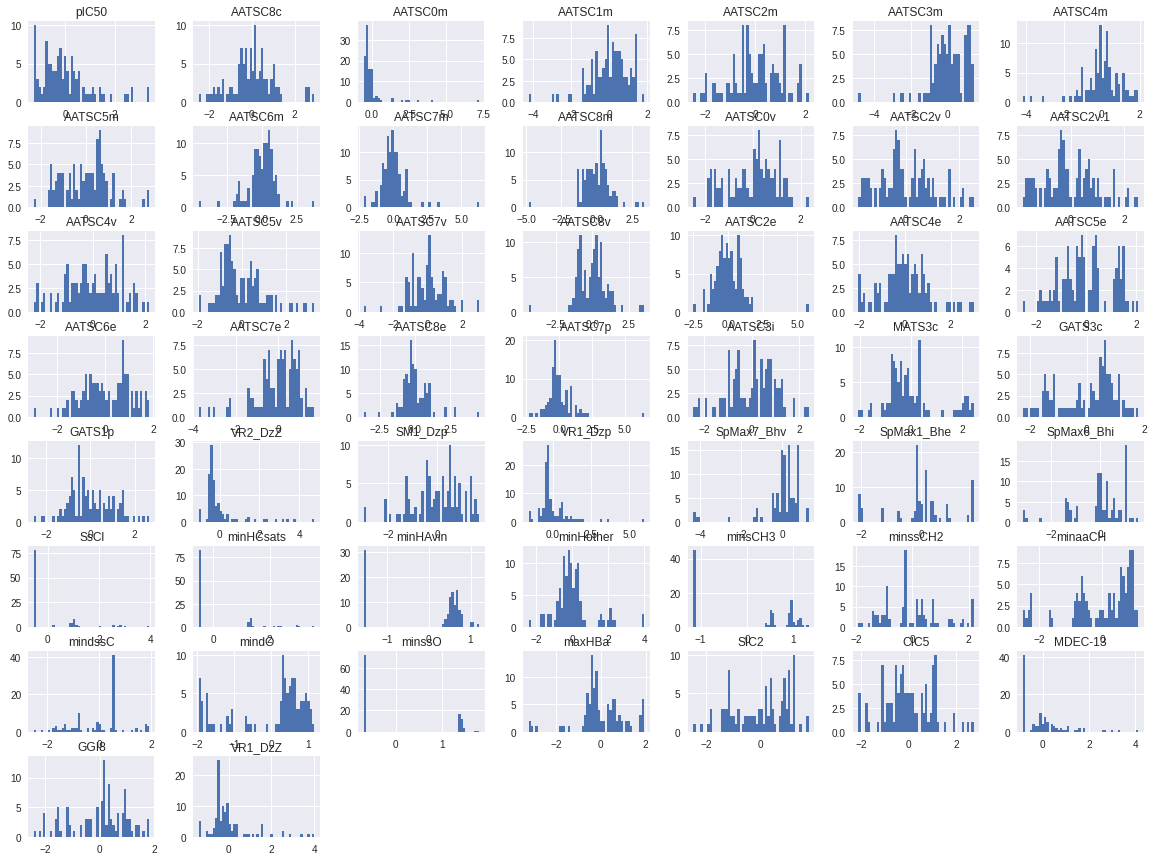

In [ ]:
df2_sc.hist(bins = 50, figsize=(20,15))
plt.show()

** Initiation of Support Vector Regressor**

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[ 3.60447603e-01 -6.15562621e-01 -4.10116637e-01 -5.77801293e-01
  3.82278944e-01 -6.51562233e-01  2.48309827e+00 -2.45304160e-02
 -1.26763958e+00 -1.26763958e+00  1.96506049e-01  2.31820181e-01
 -6.85211939e-01 -8.29248393e-01 -9.71699219e-01  4.26659659e-01
 -2.90036313e-01  7.76171271e-01 -1.26763958e+00 -1.80712173e-01
 -5.46752881e-01  2.41910195e+00 -1.26763958e+00 -4.26312482e-01
 -7.50334631e-01 -7.47227746e-01  1.47683524e+00  9.78083055e-01
 -1.72073808e-01 -4.30487778e-01 -7.79043910e-01 -8.15018107e-01
 -3.30215647e-01  8.47476842e-01 -4.14554522e-01  5.25695077e-01
 -1.00287297e+00 -5.68103721e-01  1.38311426e+00 -1.80712173e-01
 -3.10756617e-01 -1.12141611e+00 -4.13112062e-01  1.07384259e+00
 -2.40844532e-01 -1.26763958e+00 -2.30342451e-01  7.55668909e-01
 -2.79409584e-02 -7.07793788e-02  2.66094300e-01  4.19002794e-02
  8.02304434e-02 -1.26763958e+00  3.17466747e-03  6.61486023e-02
 -7.65327882e-01  3.40979929e+00  1.17648750e+00  6.64800822e-02
  2.64095438e-01  2.69416

In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
67,0.360448,0.360448
26,-0.615563,-0.615563
22,-0.410117,-0.410117
31,-0.577801,-0.577801
56,0.382279,0.382279
...,...,...
71,-0.098797,-0.098797
14,0.329546,0.329546
92,-0.135998,-0.135998
51,0.245356,0.245356


In [ ]:
len(Y_train_pred)

85

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 1.0000


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0008


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.0039


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 1.0000


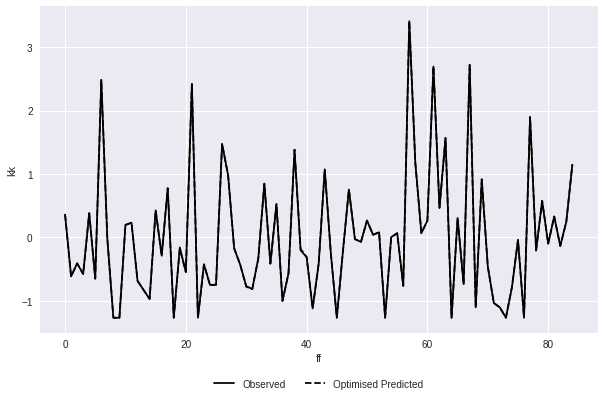

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([ 0.04190028, -0.75033463, -0.20666977,  0.30654386,  1.07384259,
        1.07384259,  0.30654386, -0.41011664,  1.1764875 , -0.73833192,
        0.06648008, -0.18071217, -0.31075662, -1.26763958, -0.02453042,
        0.97808306,  0.24535594, -0.09879688, -0.09879688, -0.57780129,
        0.26409544, -0.54675288])

In [ ]:
len(Y_test_pred)

22

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
76,0.236934,0.041900
10,-0.355840,-0.750335
4,-0.201312,-0.206670
99,-0.779144,0.306544
70,-0.231219,1.073843
66,0.556590,1.073843
30,-0.717109,0.306544
45,-0.608406,-0.410117
94,3.381814,1.176487
11,0.045625,-0.738332


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.2756


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.2756


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.5790


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.7973


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.2757


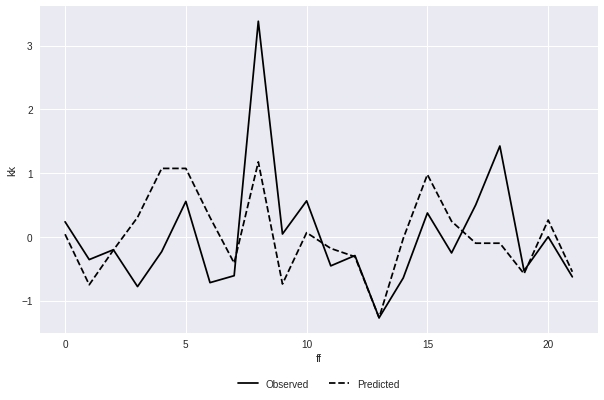

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

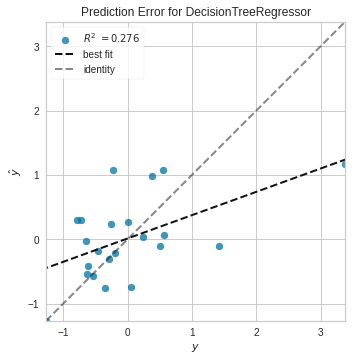

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

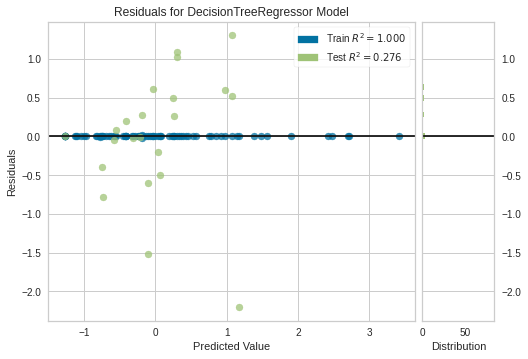

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

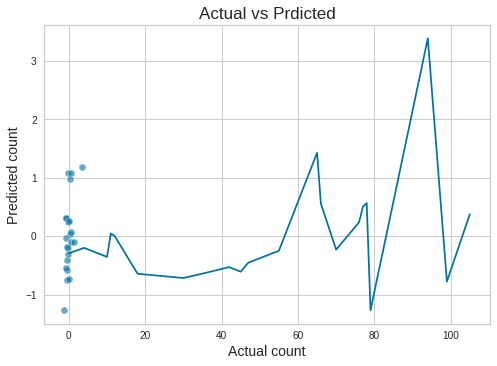

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.27562046563168807

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.8

**Using Different Hyperparametere**

In [ ]:
my_param_grid = {'max_depth':[7,8,9], 'min_samples_split':[7,8,9], 'min_samples_leaf': [7,8,9]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator= DecisionTreeRegressor(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator= DecisionTreeRegressor(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=-0.369 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.798 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=-1.455 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.102 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.064 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=-0.369 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.808 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=-1.455 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.102 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 8}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([ 0.03850283, -0.50228431, -0.30066355,  0.75639696,  0.03850283,
        0.75639696, -0.50228431, -0.50228431,  0.75639696, -0.50228431,
        0.03850283, -0.30066355, -0.50228431, -1.23652349, -0.50228431,
        0.75639696,  0.75639696,  0.03850283,  0.03850283, -0.30066355,
       -0.77022126, -0.77022126])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
76,0.236934,0.041900,0.038503
10,-0.355840,-0.750335,-0.502284
4,-0.201312,-0.206670,-0.300664
99,-0.779144,0.306544,0.756397
70,-0.231219,1.073843,0.038503


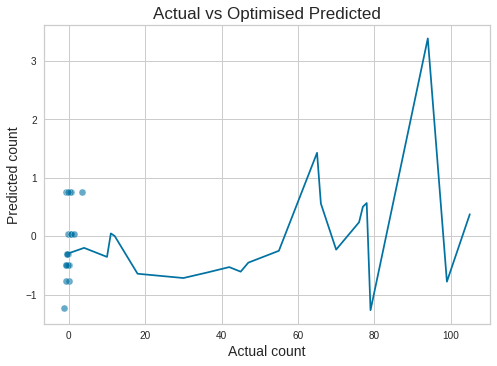

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.26837845990102827

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.8

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The training r_sq is: 0.4076


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.5178


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.8013


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.2875


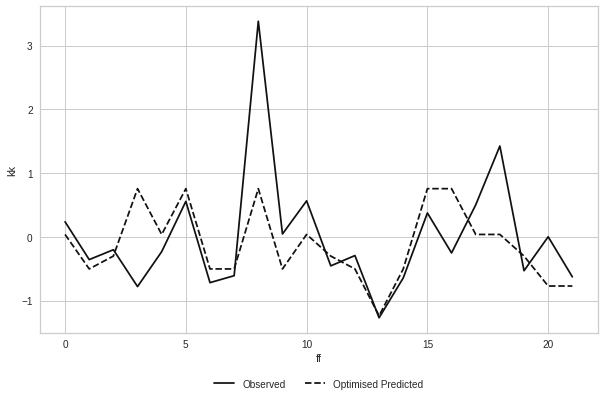

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([ 0.03850283, -0.30066355, -0.30066355, -0.50228431,  0.75639696,
       -0.77022126,  1.77662229, -0.30066355, -1.23652349, -1.23652349,
       -0.30066355,  1.77662229,  0.03850283,  1.77662229, -0.77022126,
        0.15133   , -0.50228431,  0.75639696, -1.23652349, -0.30066355,
       -0.30066355,  1.77662229,  0.15133   , -0.77022126, -0.50228431,
        0.15133   ,  1.77662229,  0.75639696, -0.30066355, -0.30066355,
       -0.77022126, -0.77022126, -0.50228431,  0.75639696, -0.50228431,
        0.15133   , -0.77022126, -0.30066355,  1.77662229, -0.30066355,
       -0.30066355, -1.23652349, -0.50228431,  0.75639696, -0.50228431,
       -1.23652349,  0.03850283,  0.75639696,  0.03850283,  0.15133   ,
        0.03850283,  0.03850283,  0.75639696, -1.23652349,  0.15133   ,
        0.75639696, -0.50228431,  1.77662229,  0.75639696,  0.03850283,
        0.15133   ,  1.77662229,  0.03850283,  0.75639696, -1.23652349,
        0.03850283, -0.50228431,  1.77662229, -1.23652349,  0.75

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
67,0.360448,0.360448,0.038503
26,-0.615563,-0.615563,-0.300664
22,-0.410117,-0.410117,-0.300664
31,-0.577801,-0.577801,-0.502284
56,0.382279,0.382279,0.756397


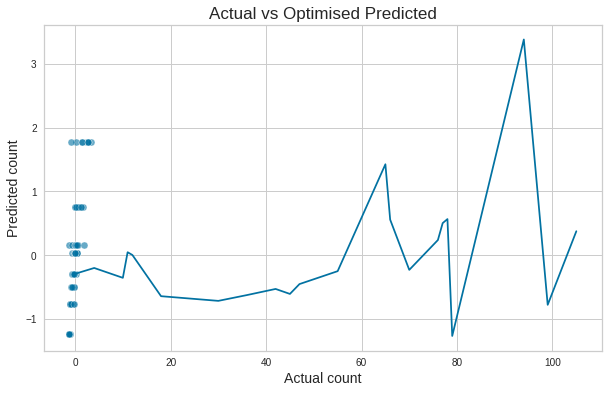

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.5697


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.3446


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.5571


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.6991


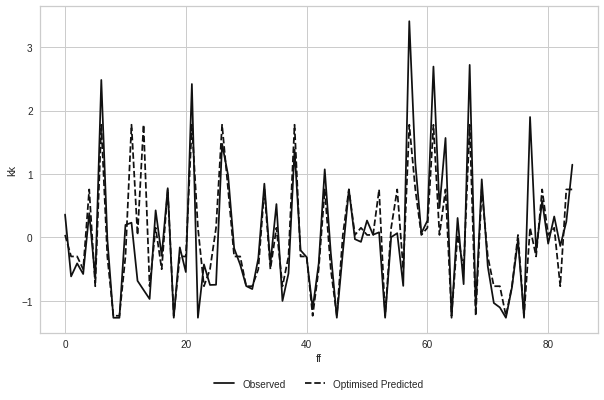

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)